2. Air Traffic Passenger Data (D2): San Francisco International Airport Report on Monthly
Passenger Traffic Statistics by Airline. Airport data is seasonal in nature, therefore any
comparative analyses should be done on a period-over-period basis (i.e. January 2010 vs.
January 2009) as opposed to period-to-period (i.e. January 2010 vs. February 2010). It is also
important to note that fact and attribute field relationships are not always 1-to-1. For example,
Passenger Counts belonging to United Airlines will appear in multiple attribute fields and are
additive, which provides flexibility for the user to derive categorical Passenger Counts as
desired.
Implement the k - Means Clustering
1. The script must load the Air Traffic Passenger dataset.
2. Find out how these airlines can be assigned to clusters using the K-Means algorithm.
3. The range of clusters is defined as range (2, 6). For each number of clusters, the clustering
algorithm is run and the WCSS and Silhouette Scores are saved into a list.
4. The optimal number of clusters is evaluated using the Silhouette Score.
5. The results to be shown on a plot (WCSS, Silhouette Score) for each k (number of clusters)

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import warnings

# Suppress the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the Air Traffic Passenger dataset (replace 'your_dataset.csv' with the actual file path)
dataset_path = 'Air_Traffic_Passenger_Statistics.csv'
df = pd.read_csv(dataset_path)
df.head()

,Activity Period,Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger_Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [8]:
df.isnull().sum()

Activity Period                 0
Airline                         0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger_Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [14]:
df['Airline'].unique()

array(['ATA Airlines', 'Air Canada ', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines',
       'American Eagle Airlines', 'Asiana Airlines',
       'Atlantic Southeast Airlines', 'BelAir Airlines',
       'British Airways', 'Cathay Pacific', 'China Airlines',
       'Delta Air Lines', 'EVA Airways', 'Frontier Airlines',
       'Hawaiian Airlines', 'Horizon Air ', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'Mesa Airlines',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines', 'SkyWest Airlines',
       'Sun Country Airlines', 'TACA', 'US Airways', 'United Airlines',
       'United Airlines - Pre 07/01/2013', 'Virgin Atlantic',
       'WestJet Airlines', 'Boeing Company', 'Miami Air International',
       'Air Canada Jazz', 'Qantas A

In [15]:
df['Airline'].nunique()

77

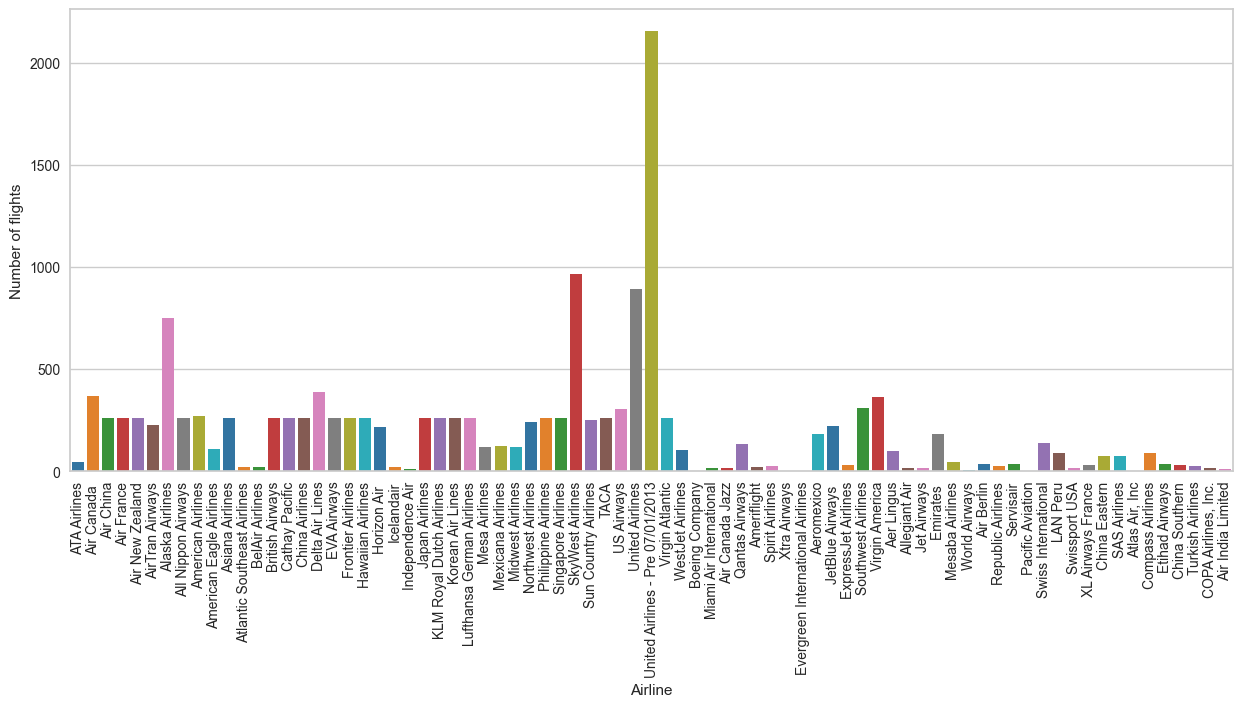

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'Airline' column
plt.figure(figsize=(15, 6))  # Adjust the size as needed

sns.countplot(x='Airline', data=df, palette='tab10')
plt.xticks(rotation=90)
plt.ylabel('Number of flights')
plt.show()


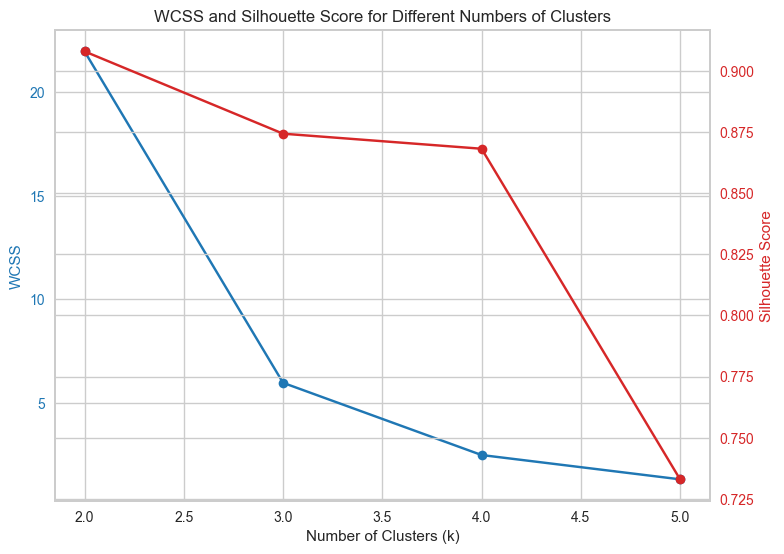

In [56]:


# Aggregate duplicate values in the 'Airline' column
aggregated_data = df.groupby('Airline')['Passenger_Count'].sum().reset_index()

# Check for duplicate values in the 'Airline' column
if aggregated_data['Airline'].duplicated().any():
    raise ValueError("Duplicate values found in the 'Airline' column. Please ensure 'Airline' column has unique values.")

# Extract relevant columns
columns_of_interest = ['Airline', 'Passenger_Count']
data = aggregated_data[columns_of_interest]

# Prepare the data for clustering
X = data['Passenger_Count'].values.reshape(-1, 1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement k-means clustering and evaluate the optimal number of clusters
wcss = []  # Within-Cluster-Sum-of-Squares
silhouette_scores = []

# Define the range of clusters
k_range = range(2, 6)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    pipeline = make_pipeline(scaler, kmeans)
    pipeline.fit(X)
    
    # WCSS (Inertia)
    wcss.append(pipeline.named_steps['kmeans'].inertia_)
    
    # Silhouette Score
    labels = pipeline.predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the results
fig, ax1 = plt.subplots()

ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS', color='tab:blue')
ax1.plot(k_range, wcss, color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:red')
ax2.plot(k_range, silhouette_scores, color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('WCSS and Silhouette Score for Different Numbers of Clusters')
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale
from sklearn.cluster import KMeans

In [30]:
dfcopy = df.copy()

In [31]:
dfa = dfcopy[["Passenger_Count","Airline","Activity Period"]]

In [32]:
dfa

,Passenger_Count,Airline,Activity Period
0,27271,ATA Airlines,200507
1,29131,ATA Airlines,200507
2,5415,ATA Airlines,200507
3,35156,Air Canada,200507
4,34090,Air Canada,200507
...,...,...,...
15002,194636,Virgin America,201603
15003,4189,Virgin America,201603
15004,4693,Virgin America,201603
15005,12313,Virgin Atlantic,201603


In [53]:
df_dummies = pd.get_dummies(dfa,drop_first=True)


In [34]:
model = KMeans(random_state = 42)

In [52]:
model.fit_predict(df_dummies)

array([2, 2, 6, ..., 6, 2, 6])

In [68]:
#ssd = sum of squared distance
import warnings

# Suppress the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

ssd = []

K = range(2,6)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(df_dummies)
    ssd.append(model.inertia_)

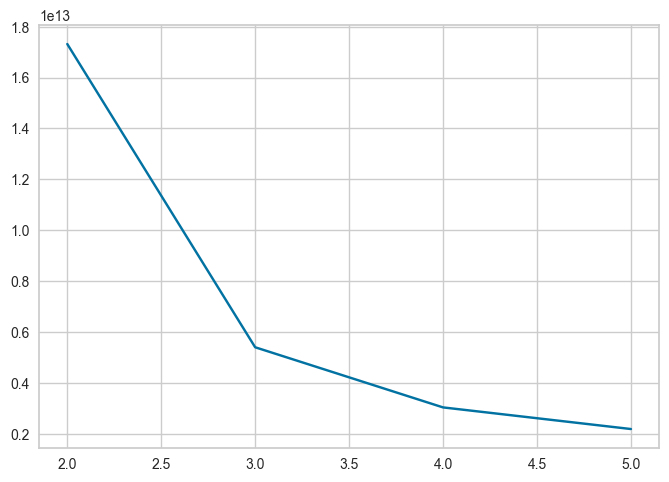

In [69]:
sns.lineplot(x=K, y = ssd)
plt.show()

In [45]:
from yellowbrick.cluster import KElbowVisualizer

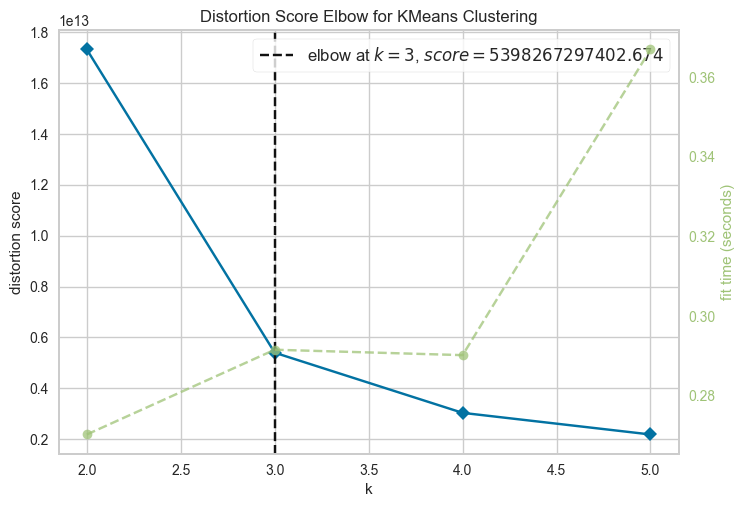

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings

# Suppress the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)


# Assuming df_dummies is your DataFrame
model = KMeans(random_state=42)

# Use the KElbowVisualizer from Yellowbrick
visualizer = KElbowVisualizer(model, k=(2, 6))

# Fit the data to the visualizer
visualizer.fit(df_dummies)

# Visualize the elbow plot
visualizer.poof()


In [58]:
model = KMeans(n_clusters=4)
model.fit(df_dummies)

KMeans(n_clusters=4)

In [59]:
dfcopy["cluster"] = model.labels_

In [60]:
dfcopy["cluster"].value_counts()

cluster
3    12048
0     1742
2      924
1      293
Name: count, dtype: int64

In [61]:
from sklearn.metrics import silhouette_score

In [62]:
silhouette_score(df_dummies, dfcopy.cluster)

0.7818863214702171

In [63]:
dfcopy[dfcopy["cluster"]==0]

,Activity Period,Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger_Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,cluster
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July,0
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July,0
13,200507,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Deplaned,Other,International,A,36641,Deplaned,36641,2005,July,0
14,200507,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Enplaned,Other,International,A,39379,Enplaned,39379,2005,July,0
40,200507,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 1,C,93791,Enplaned,93791,2005,July,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14903,201603,American Airlines,AA,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 1,C,67085,Enplaned,67085,2016,March,0
14938,201603,JetBlue Airways,B6,JetBlue Airways,B6,Domestic,US,Deplaned,Low Fare,International,A,61855,Deplaned,61855,2016,March,0
14939,201603,JetBlue Airways,B6,JetBlue Airways,B6,Domestic,US,Enplaned,Low Fare,International,A,61551,Enplaned,61551,2016,March,0
14985,201603,United Airlines,UA,United Airlines,UA,International,Asia,Deplaned,Other,International,G,67286,Deplaned,67286,2016,March,0


In [64]:
dfcopy[dfcopy["cluster"]==1]

,Activity Period,Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger_Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,cluster
93,200507,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Deplaned,Other,Terminal 3,F,443656,Deplaned,443656,2005,July,1
94,200507,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Enplaned,Other,Terminal 3,F,421802,Enplaned,421802,2005,July,1
212,200508,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Deplaned,Other,Terminal 3,F,420430,Deplaned,420430,2005,August,1
213,200508,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Enplaned,Other,Terminal 3,F,398135,Enplaned,398135,2005,August,1
330,200509,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Deplaned,Other,Terminal 3,F,357533,Deplaned,357533,2005,September,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14859,201602,United Airlines,UA,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 3,F,257190,Enplaned,257190,2016,February,1
14979,201603,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,E,248521,Deplaned,248521,2016,March,1
14980,201603,United Airlines,UA,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 3,E,263407,Enplaned,263407,2016,March,1
14982,201603,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,327187,Deplaned,327187,2016,March,1


In [65]:
dfcopy[dfcopy["cluster"]==2]

,Activity Period,Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger_Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,cluster
23,200507,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,166577,Deplaned,166577,2005,July,2
24,200507,American Airlines,AA,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 3,E,160890,Enplaned,160890,2005,July,2
39,200507,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Deplaned,Other,Terminal 1,C,97510,Deplaned,97510,2005,July,2
77,200507,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Deplaned,Other,Terminal 3,F,103279,Deplaned,103279,2005,July,2
78,200507,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Enplaned,Other,Terminal 3,F,102023,Enplaned,102023,2005,July,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14959,201603,SkyWest Airlines,OO,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 3,F,158773,Enplaned,158773,2016,March,2
14963,201603,Southwest Airlines,WN,Southwest Airlines,WN,Domestic,US,Deplaned,Low Fare,Terminal 1,B,141992,Deplaned,141992,2016,March,2
14964,201603,Southwest Airlines,WN,Southwest Airlines,WN,Domestic,US,Enplaned,Low Fare,Terminal 1,B,142567,Enplaned,142567,2016,March,2
15001,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Deplaned,Low Fare,Terminal 2,D,186464,Deplaned,186464,2016,March,2


In [66]:
dfcopy[dfcopy["cluster"]==3]

,Activity Period,Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger_Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,cluster
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July,3
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July,3
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July,3
5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,2005,July,3
6,200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,2005,July,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,201603,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,F,17521,Enplaned,17521,2016,March,3
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March,3
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March,3
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March,3
